In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing the dataset
dataset = pd.read_csv("winequality-red.csv", delimiter=";")

In [3]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# To find out if there are any missing values 
dataset.isna().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

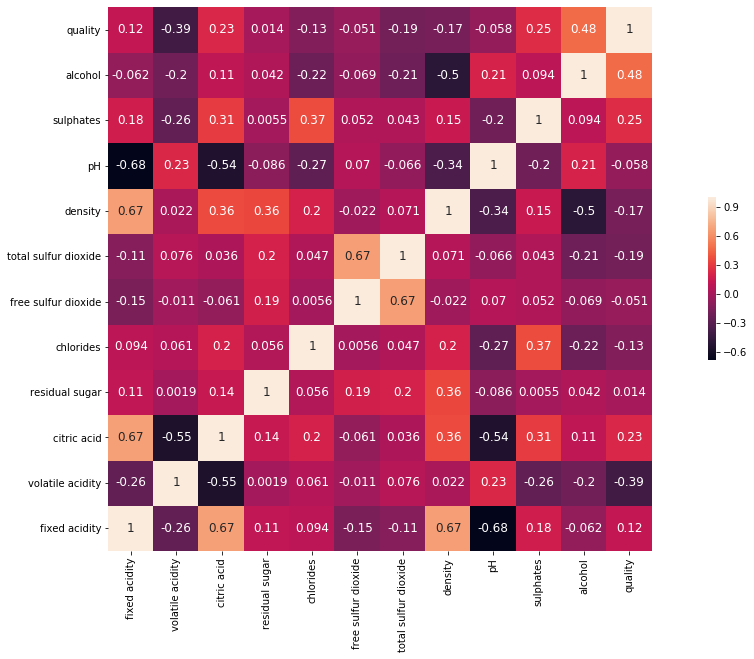

In [6]:
# cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )  # color map
plt.figure(figsize=(20,10))
g = sns.heatmap(data      = dataset.corr(),  
            square    = True, 
            cbar_kws  = {'shrink': .3}, 
            annot     = True, 
            annot_kws = {'fontsize': 12},
           )
g.set(ylim=(0,12))
g.set(xlim=(0,12))
plt.show()

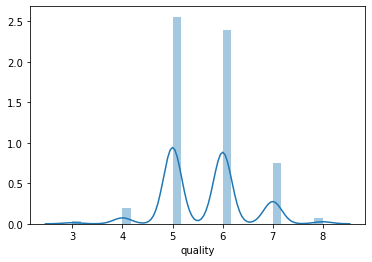

In [7]:
sns.distplot(dataset['quality'])
plt.show()

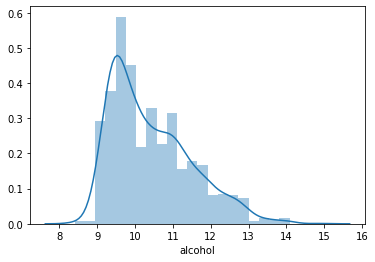

In [8]:
sns.distplot(dataset['alcohol'])
plt.show()

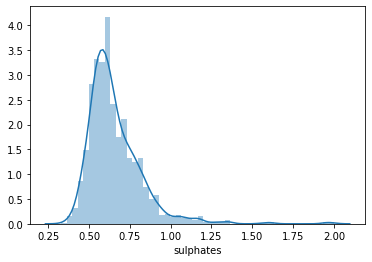

In [9]:
sns.distplot(dataset['sulphates'])
plt.show()

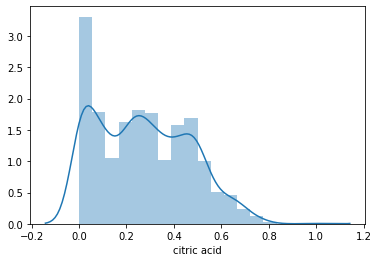

In [10]:
sns.distplot(dataset['citric acid'])
plt.show()

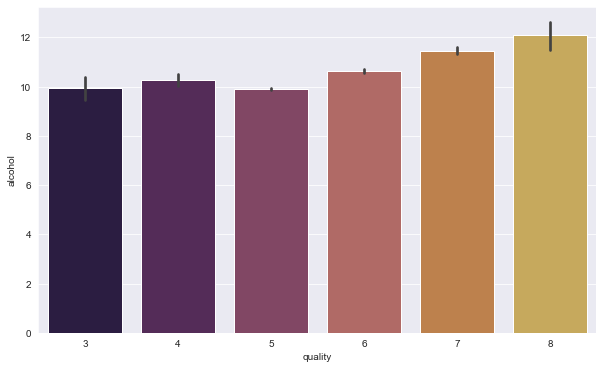

In [180]:
sns.barplot("quality", y="alcohol", data=dataset, saturation=.5, palette = 'inferno')
plt.show()

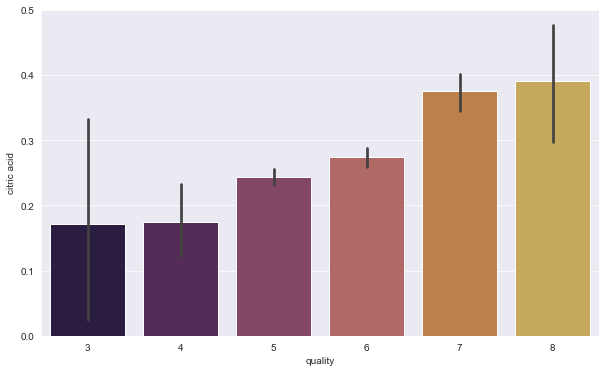

In [179]:
sns.barplot("quality", y="citric acid", data=dataset,saturation=.5, palette = 'inferno')
plt.show()

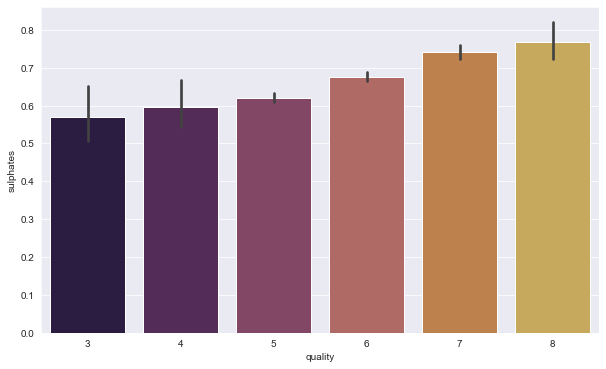

In [181]:
sns.barplot("quality", y="sulphates", data=dataset, saturation=.5, palette = 'inferno')
plt.show()

In [11]:
Features = ['citric acid','sulphates','alcohol']

In [12]:
x = dataset.iloc[:,[2,9,10]].values
y = dataset.iloc[:,-1].values

In [13]:
print(x)

[[ 0.    0.56  9.4 ]
 [ 0.    0.68  9.8 ]
 [ 0.04  0.65  9.8 ]
 ...
 [ 0.13  0.75 11.  ]
 [ 0.12  0.71 10.2 ]
 [ 0.47  0.66 11.  ]]


In [14]:
print(y)

[5 5 5 ... 6 5 6]


In [15]:
#max(dataset['fixed acidity'])

In [16]:
# Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
print(x_train[0])

[0.45 0.62 9.4 ]


In [18]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,[2]] = sc.fit_transform(x_train[:,[2]])
x_test[:,[2]] = sc.transform(x_test[:,[2]])

In [19]:
print(x_train[0])

[ 0.45        0.62       -0.95579434]


----

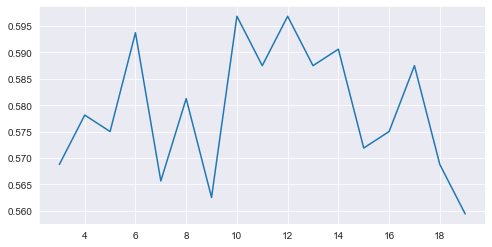

In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for neighbors in range(3,20,1):
    classifier = KNeighborsClassifier(n_neighbors=neighbors, metric='minkowski')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
plt.plot(list(range(3,20,1)), list1)
plt.show()

In [110]:
# Training the K Nearest Neighbor Classifier on the Training set
classifier = KNeighborsClassifier(n_neighbors=10, metric='minkowski')
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [111]:
y_pred = classifier.predict(x_test)
print(y_pred)

[6 5 7 5 5 5 5 6 5 5 5 6 6 6 6 6 7 5 6 6 6 5 6 7 5 5 5 7 5 6 5 6 6 5 6 6 5
 5 6 5 5 6 6 7 7 5 5 6 5 6 5 5 5 7 5 5 5 5 7 6 6 5 6 6 5 6 5 5 6 6 6 5 5 5
 6 6 5 5 5 6 5 6 6 5 6 6 6 5 5 5 5 5 6 5 5 6 6 5 5 5 7 5 6 6 5 5 5 5 6 5 6
 5 5 5 6 6 6 7 7 6 5 5 5 5 7 6 5 6 5 6 5 5 7 5 6 5 6 5 6 5 6 5 5 5 5 6 5 7
 6 5 5 5 5 6 5 6 5 5 6 5 6 5 7 5 6 5 6 7 5 6 5 6 6 7 6 6 5 6 6 5 5 7 5 6 7
 5 5 6 5 7 6 5 5 5 5 5 5 5 5 5 5 7 5 6 6 5 5 7 5 6 5 6 5 6 5 5 5 6 6 5 5 5
 7 5 5 6 6 5 5 5 5 6 6 6 6 6 6 7 6 6 5 6 5 5 6 5 5 5 5 6 5 5 5 6 5 5 5 5 5
 6 5 6 5 5 5 5 5 5 5 7 5 5 6 5 6 6 7 5 7 6 5 7 5 7 5 5 6 5 7 6 5 6 6 5 5 6
 5 5 6 5 6 5 5 6 6 6 6 5 5 5 7 6 5 5 5 6 5 6 5 6]


In [112]:
np.set_printoptions()
print(np.concatenate( (y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[6 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [5 6]
 [5 5]
 [6 6]
 [5 4]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [6 5]
 [6 6]
 [6 6]
 [7 7]
 [5 5]
 [6 5]
 [6 4]
 [6 7]
 [5 6]
 [6 6]
 [7 4]
 [5 6]
 [5 5]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [6 5]
 [5 6]
 [6 7]
 [6 7]
 [5 5]
 [5 6]
 [6 6]
 [5 7]
 [5 5]
 [6 7]
 [6 6]
 [7 6]
 [7 5]
 [5 5]
 [5 6]
 [6 6]
 [5 6]
 [6 5]
 [5 5]
 [5 5]
 [5 6]
 [7 6]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 5]
 [6 5]
 [5 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 6]
 [5 4]
 [5 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [5 6]
 [6 5]
 [6 6]
 [5 6]
 [6 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [6 4]
 [5 5]
 [5 7]
 [6 6]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [7 8]
 [5 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [5 7]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [7 7]
 [7 6]
 [6 6]
 [5 5]
 [5 7]
 [5 5]
 [5 5]
 [7 6]
 [6 6]
 [5 5]
 [6 5]
 [5 5]
 [6 6]
 [5 6]
 [5 6]
 [7 6]
 [5 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 8]
 [5 5]
 [6 6]
 [5 5]
 [5 6]

In [113]:
# Making the confusion matrix and accuracy
mylist = []
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
mylist.append(ac)
print(cm)
print(ac)

[[  0   0   2   0   0   0]
 [  0   0   8   2   1   0]
 [  0   0 107  25   3   0]
 [  0   0  51  75  16   0]
 [  0   0   6  12   9   0]
 [  0   0   0   1   2   0]]
0.596875


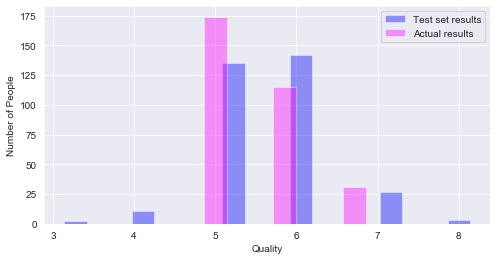

In [114]:
# Distplot between Quality of Red Wine of test set results and predicted results
plt.rcParams['figure.figsize']=8,4 
sns.set_style("darkgrid")
sns.distplot(y_test, color = "blue", kde = False, label = "Test set results", hist_kws = {"align": "right"})
sns.distplot(y_pred, color = "magenta", kde = False, label = "Actual results", hist_kws = {"align": "left"})
plt.xlabel("Quality")
plt.ylabel("Number of People")
plt.legend()
plt.show()

-----

In [115]:
# Training the Naive Bayes Classifier on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [116]:
y_pred = classifier.predict(x_test)
print(y_pred)

[6 5 7 5 6 5 5 6 5 5 5 5 5 6 5 7 7 5 6 5 6 5 5 6 5 5 5 7 5 6 5 6 5 5 6 7 5
 5 6 6 5 6 7 7 6 5 5 6 5 6 5 5 5 7 5 5 5 5 7 5 5 5 6 6 5 6 5 6 7 6 5 6 5 5
 5 6 5 5 6 7 6 5 6 6 5 5 6 5 5 5 5 5 6 5 6 5 6 5 5 6 7 6 6 7 6 5 6 5 6 5 6
 5 6 5 6 5 5 7 6 5 5 6 4 5 7 6 5 5 6 7 5 5 6 6 6 5 6 5 6 5 6 5 5 5 5 5 6 6
 6 5 6 6 5 5 5 5 5 5 6 6 6 5 6 5 6 5 6 6 5 6 6 5 5 7 6 6 6 7 6 5 5 7 5 6 6
 5 5 6 5 6 6 5 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 6 5 7 5 5 6 6 5 5 5 6
 6 5 5 6 6 6 5 5 5 6 5 6 6 5 6 7 6 6 5 5 5 5 6 5 5 5 6 6 5 5 5 5 5 5 5 5 5
 6 5 8 5 5 5 5 5 5 5 7 5 5 5 6 7 6 6 5 6 7 5 7 5 6 5 5 5 5 6 6 5 6 5 5 5 6
 5 5 5 5 6 5 5 5 6 6 5 5 5 5 6 6 5 5 5 7 6 6 5 6]


In [117]:
np.set_printoptions()
print(np.concatenate( (y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[6 6]
 [5 5]
 [7 7]
 [5 6]
 [6 5]
 [5 6]
 [5 5]
 [6 6]
 [5 4]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [6 5]
 [5 6]
 [7 6]
 [7 7]
 [5 5]
 [6 5]
 [5 4]
 [6 7]
 [5 6]
 [5 6]
 [6 4]
 [5 6]
 [5 5]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 6]
 [6 7]
 [7 7]
 [5 5]
 [5 6]
 [6 6]
 [6 7]
 [5 5]
 [6 7]
 [7 6]
 [7 6]
 [6 5]
 [5 5]
 [5 6]
 [6 6]
 [5 6]
 [6 5]
 [5 5]
 [5 5]
 [5 6]
 [7 6]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [5 5]
 [5 5]
 [5 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 5]
 [7 6]
 [6 6]
 [5 6]
 [6 6]
 [5 4]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [7 6]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [6 4]
 [5 5]
 [6 7]
 [5 6]
 [6 6]
 [5 5]
 [5 6]
 [6 5]
 [7 8]
 [6 6]
 [6 6]
 [7 6]
 [6 5]
 [5 5]
 [6 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [5 6]
 [5 6]
 [7 7]
 [6 6]
 [5 6]
 [5 5]
 [6 7]
 [4 5]
 [5 5]
 [7 6]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [7 6]
 [5 6]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 8]
 [5 5]
 [6 6]
 [5 5]
 [5 6]

In [118]:
# Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   1 109  23   2   0]
 [  0   0  61  69  11   1]
 [  0   0   1  15  11   0]
 [  0   0   0   1   2   0]]
0.590625


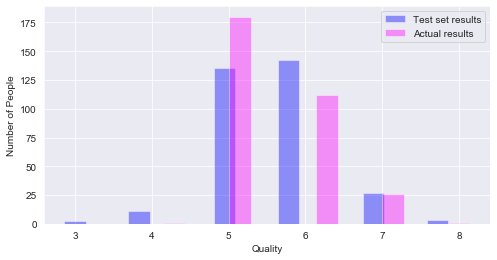

In [119]:
# Distplot between Quality of Red Wine of test set results and predicted results
plt.rcParams['figure.figsize']=8,4 
sns.set_style("darkgrid")
sns.distplot(y_test, color = "blue", kde = False, label = "Test set results",  hist_kws = {"align": "left"})
sns.distplot(y_pred, color = "magenta", kde = False, label = "Actual results",  hist_kws = {"align": "right"})
plt.xlabel("Quality")
plt.ylabel("Number of People")
plt.legend()
plt.show()

----

In [120]:
# Training the Support Vector Classifier on the Training set
from sklearn.svm import SVC
classifier = SVC(random_state=0, kernel = 'rbf')
classifier.fit(x_train, y_train)

C:\Users\barun\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [121]:
y_pred = classifier.predict(x_test)
print(y_pred)

[6 5 6 5 6 5 5 6 5 5 5 5 6 6 5 6 6 5 6 5 6 5 5 6 5 5 5 6 5 6 6 6 6 5 6 6 5
 5 6 6 5 6 6 7 6 5 5 6 6 6 5 5 5 6 5 5 5 5 6 5 5 6 6 6 5 6 5 6 6 6 6 5 5 5
 5 6 5 5 6 6 6 5 6 6 5 5 6 5 5 5 5 5 6 5 6 6 6 5 5 5 7 6 6 6 6 5 6 5 6 5 6
 5 6 5 6 5 5 6 6 5 5 6 5 5 6 6 5 5 6 6 5 5 6 6 6 5 5 5 5 5 6 5 5 5 5 5 6 6
 6 5 6 6 5 5 5 6 5 5 6 6 6 5 6 5 6 5 6 6 5 6 6 5 5 6 6 6 6 6 6 5 5 6 5 5 6
 5 5 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 5 5 5 6 6 5 6 6 5 7 5 5 5 6 5 5 5 6
 6 5 5 6 6 6 5 5 5 6 5 6 6 6 6 6 6 6 5 5 5 5 6 5 5 5 5 6 5 5 5 6 5 5 5 5 5
 5 5 6 5 5 5 5 5 5 5 6 5 5 5 6 6 6 6 5 6 6 5 7 5 6 5 5 5 5 6 5 6 6 6 5 5 6
 5 5 5 5 6 6 5 5 6 6 6 5 5 5 6 6 5 5 5 6 6 6 5 6]


In [122]:
np.set_printoptions()
print(np.concatenate( (y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[6 6]
 [5 5]
 [6 7]
 [5 6]
 [6 5]
 [5 6]
 [5 5]
 [6 6]
 [5 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 5]
 [5 6]
 [6 6]
 [6 7]
 [5 5]
 [6 5]
 [5 4]
 [6 7]
 [5 6]
 [5 6]
 [6 4]
 [5 6]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [6 5]
 [5 6]
 [6 7]
 [6 7]
 [5 5]
 [5 6]
 [6 6]
 [6 7]
 [5 5]
 [6 7]
 [6 6]
 [7 6]
 [6 5]
 [5 5]
 [5 6]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [5 5]
 [5 6]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 5]
 [6 6]
 [6 6]
 [6 6]
 [5 6]
 [5 4]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [6 4]
 [5 5]
 [6 7]
 [6 6]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [7 8]
 [6 6]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [6 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [5 6]
 [5 6]
 [6 7]
 [6 6]
 [5 6]
 [5 5]
 [6 7]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [5 6]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [5 8]
 [5 5]
 [6 6]
 [5 5]
 [5 6]

In [123]:
# Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0 107  27   1   0]
 [  0   0  56  85   1   0]
 [  0   0   2  24   1   0]
 [  0   0   1   1   1   0]]
0.603125


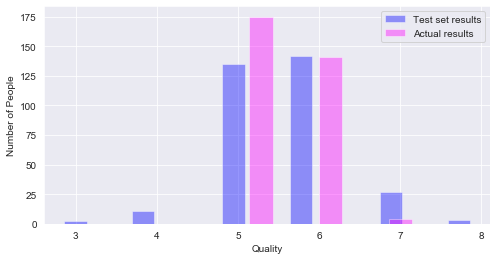

In [124]:
# Distplot between Quality of Red Wine of test set results and predicted results
plt.rcParams['figure.figsize']=8,4 
sns.set_style("darkgrid")
sns.distplot(y_test, color = "blue", kde = False, label = "Test set results",  hist_kws = {"align": "left"})
sns.distplot(y_pred, color = "magenta", kde = False, label = "Actual results", hist_kws = {"align": "right"})
plt.xlabel("Quality")
plt.ylabel("Number of People")
plt.legend()
plt.show()

-----

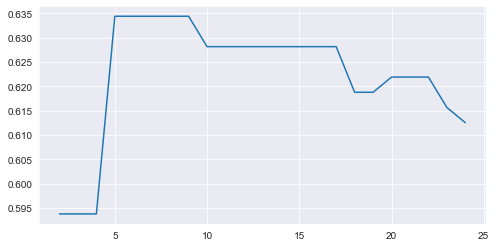

In [125]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for leaves in range(2,25):
    classifier = DecisionTreeClassifier(max_leaf_nodes = leaves, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(2,25)), list1)
plt.show()

In [126]:
# Training the Decision Tree Classifier on the Training set
classifier = DecisionTreeClassifier(max_leaf_nodes = 5, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=5,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [127]:
y_pred = classifier.predict(x_test)
print(y_pred)

[6 5 6 5 6 5 6 6 5 5 5 6 6 6 6 6 6 5 6 5 6 5 5 6 5 5 5 6 5 6 6 6 6 6 6 6 5
 5 6 6 5 6 6 6 6 5 5 6 6 6 5 5 6 6 5 5 5 5 6 5 5 6 6 6 5 6 5 6 6 6 6 5 5 6
 6 6 5 5 6 6 6 5 6 6 6 6 6 5 5 5 5 5 6 5 6 6 6 5 5 5 6 6 6 6 6 5 6 5 6 5 6
 5 6 5 6 6 6 6 6 5 5 6 5 5 6 6 5 5 6 6 5 5 6 6 6 5 6 5 5 5 6 5 5 5 5 5 6 6
 6 5 6 6 5 5 6 6 5 6 6 6 6 6 6 5 6 5 6 6 6 6 6 5 5 6 6 6 6 6 6 5 5 6 6 6 6
 5 6 6 5 6 6 6 5 5 5 5 5 5 5 5 5 6 5 5 6 5 5 6 6 5 6 6 5 6 5 6 5 6 6 5 5 6
 6 5 6 6 6 6 5 5 5 6 6 6 6 6 6 6 6 6 5 6 5 5 6 5 5 6 5 6 5 6 5 6 5 5 5 5 5
 6 5 6 5 5 5 5 6 5 5 6 5 5 5 6 6 6 6 5 6 6 5 6 5 6 5 5 5 5 6 6 6 6 6 5 5 6
 5 5 6 5 6 6 5 6 6 6 6 5 5 5 6 6 5 5 5 6 6 6 5 6]


In [128]:
np.set_printoptions()
print(np.concatenate( (y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[6 6]
 [5 5]
 [6 7]
 [5 6]
 [6 5]
 [5 6]
 [6 5]
 [6 6]
 [5 4]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [6 5]
 [6 6]
 [6 6]
 [6 7]
 [5 5]
 [6 5]
 [5 4]
 [6 7]
 [5 6]
 [5 6]
 [6 4]
 [5 6]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [6 5]
 [6 6]
 [6 7]
 [6 7]
 [5 5]
 [5 6]
 [6 6]
 [6 7]
 [5 5]
 [6 7]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [5 6]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 5]
 [6 6]
 [6 6]
 [6 6]
 [5 6]
 [5 4]
 [6 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [5 6]
 [6 4]
 [5 5]
 [6 7]
 [6 6]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [6 8]
 [6 6]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [6 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [6 7]
 [6 6]
 [5 6]
 [5 5]
 [6 7]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [6 5]
 [6 6]
 [5 6]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [5 8]
 [5 5]
 [6 6]
 [5 5]
 [5 6]

In [129]:
# Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[  0   0   2   0   0   0]
 [  0   0   7   4   0   0]
 [  0   0  97  38   0   0]
 [  0   0  36 106   0   0]
 [  0   0   0  27   0   0]
 [  0   0   1   2   0   0]]
0.634375


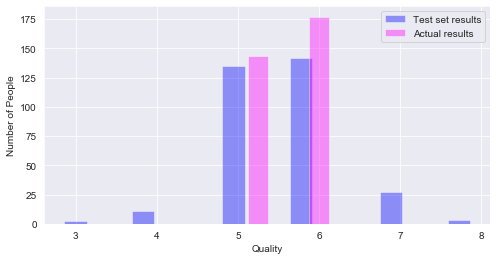

In [130]:
# Distplot between Quality of Red Wine of test set results and predicted results
plt.rcParams['figure.figsize']=8,4 
sns.set_style("darkgrid")
sns.distplot(y_test, color = "blue", kde = False, label = "Test set results", hist_kws = {"align": "left"})
sns.distplot(y_pred, color = "magenta", kde = False, label = "Actual results", hist_kws = {"align": "right"})
plt.xlabel("Quality")
plt.ylabel("Number of People")
plt.legend()
plt.show()

----

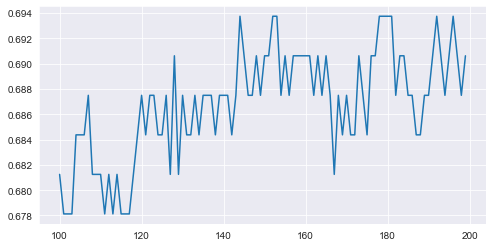

In [131]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(100,200):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(100,200)), list1)
plt.show()

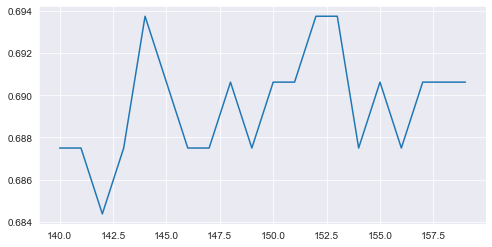

In [132]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
list1 = []
for estimators in range(140,160):
    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    list1.append(accuracy_score(y_test,y_pred))
#print(mylist)
plt.plot(list(range(140,160)), list1)
plt.show()

In [133]:
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import confusion_matrix, accuracy_score
#mylist = []
#for estimators in range(100,1000):
#    classifier = RandomForestClassifier(n_estimators = estimators, random_state=0, criterion='entropy')
#    classifier.fit(x_train, y_train)
#    y_pred = classifier.predict(x_test)
#    mylist.append(accuracy_score(y_test,y_pred))
#print(mylist)
#plt.plot(list(range(100,1000)), mylist)
#plt.show()

In [134]:
# Training the Random Forest Classifier on the Training set
classifier = RandomForestClassifier(n_estimators=180, random_state=0, criterion='entropy')
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=180,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [135]:
y_pred = classifier.predict(x_test)
print(y_pred)

[7 5 7 5 5 6 5 6 5 5 5 5 6 6 6 7 7 6 5 5 6 5 6 7 5 5 5 7 5 6 5 5 6 6 7 7 5
 6 6 4 6 6 6 7 7 5 5 6 6 6 5 5 6 6 6 5 5 5 7 6 6 5 6 5 5 7 5 5 6 6 6 5 4 6
 6 6 5 5 5 7 5 5 6 5 6 6 6 5 5 5 5 6 6 5 6 6 6 5 5 5 7 5 6 7 5 6 5 5 6 5 6
 5 7 5 6 6 6 7 6 6 5 5 6 5 7 5 5 5 5 6 5 5 6 5 6 5 6 5 6 5 6 5 5 5 5 6 7 6
 5 5 5 5 5 6 6 6 5 6 6 6 6 5 5 5 5 5 6 7 6 6 7 5 6 6 6 6 6 6 7 5 5 7 5 6 6
 5 5 6 5 5 6 5 5 6 5 5 5 5 5 5 5 6 6 6 6 5 5 7 5 6 5 6 5 7 5 6 5 6 6 5 5 6
 6 6 6 6 6 6 5 6 5 6 6 6 7 6 6 7 7 6 5 6 5 6 6 5 6 5 5 6 5 5 6 6 5 5 5 5 5
 7 5 6 5 6 5 5 5 5 5 7 5 6 6 6 6 6 7 6 7 7 5 7 6 6 6 5 5 5 7 6 5 6 6 5 5 6
 6 5 6 5 6 5 6 5 6 6 6 5 5 5 5 6 5 5 5 6 6 7 5 6]


In [136]:
np.set_printoptions()
print(np.concatenate( (y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[7 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 5]
 [6 6]
 [7 6]
 [7 7]
 [6 5]
 [5 5]
 [5 4]
 [6 7]
 [5 6]
 [6 6]
 [7 4]
 [5 6]
 [5 5]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [5 5]
 [5 6]
 [6 5]
 [6 6]
 [7 7]
 [7 7]
 [5 5]
 [6 6]
 [6 6]
 [4 7]
 [6 5]
 [6 7]
 [6 6]
 [7 6]
 [7 5]
 [5 5]
 [5 6]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [6 5]
 [6 5]
 [5 6]
 [6 6]
 [5 6]
 [5 5]
 [7 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 6]
 [4 4]
 [6 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [5 6]
 [5 5]
 [6 6]
 [5 6]
 [6 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [5 5]
 [6 7]
 [6 6]
 [6 6]
 [5 5]
 [5 6]
 [5 5]
 [7 8]
 [5 6]
 [6 6]
 [7 6]
 [5 5]
 [6 5]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [7 7]
 [6 6]
 [6 6]
 [5 5]
 [5 7]
 [6 5]
 [5 5]
 [7 6]
 [5 6]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [5 6]
 [5 6]
 [6 6]
 [5 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 8]
 [5 5]
 [6 6]
 [5 5]
 [5 6]

In [137]:
# Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[  0   0   2   0   0   0]
 [  0   1   6   3   1   0]
 [  0   0 105  26   4   0]
 [  0   0  32  98  12   0]
 [  0   1   2   6  18   0]
 [  0   0   0   2   1   0]]
0.69375


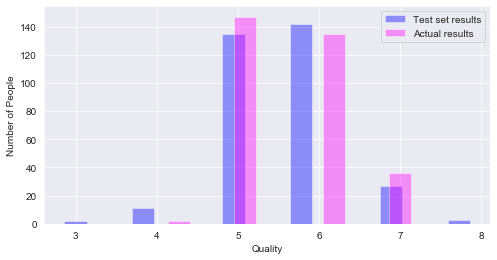

In [138]:
# Distplot between Quality of Red Wine of test set results and predicted results
plt.rcParams['figure.figsize']=8,4 
sns.set_style("darkgrid")
sns.distplot(y_test, color = "blue", kde = False, label = "Test set results", hist_kws = {"align": "left"} )
sns.distplot(y_pred, color = "magenta", kde = False, label = "Actual results", hist_kws = {"align": "right"})
plt.xlabel("Quality")
plt.ylabel("Number of People")
plt.legend()
plt.show()

----

In [139]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)

In [140]:
print(y_pred)

[7 5 7 5 5 6 5 6 5 5 5 5 6 6 5 7 7 6 5 6 6 5 6 7 5 5 5 7 5 7 5 6 6 7 7 7 5
 6 6 4 6 6 6 7 7 5 5 6 6 6 5 5 6 6 6 5 5 5 7 5 5 5 5 5 5 8 5 5 6 6 6 5 4 6
 6 6 5 5 5 7 5 5 6 5 6 6 6 5 5 5 5 6 6 5 6 6 7 5 5 5 7 5 6 7 5 5 5 5 6 5 6
 5 7 5 6 6 6 6 7 6 5 5 6 5 7 5 5 5 6 7 5 6 6 6 6 5 6 5 6 5 6 6 5 5 5 6 7 6
 5 5 5 5 5 5 6 6 5 6 7 7 6 5 6 5 5 5 6 7 6 6 5 5 6 7 6 6 6 6 7 5 5 7 5 6 6
 5 6 6 5 5 6 5 5 5 5 5 5 5 5 6 5 6 6 6 6 5 5 7 7 6 5 6 5 7 5 6 5 6 6 5 5 6
 6 6 5 6 7 5 5 6 5 6 6 6 6 6 6 7 7 6 5 6 5 6 6 6 6 5 5 6 5 5 6 6 5 5 5 5 6
 7 5 6 5 6 6 5 5 5 5 7 5 6 6 6 7 6 7 5 7 7 5 7 6 6 6 5 5 5 7 6 5 6 6 5 5 6
 6 5 6 5 6 5 6 5 6 6 6 5 5 5 5 6 5 5 5 6 5 6 5 7]


In [141]:
np.set_printoptions()
print(np.concatenate( (y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)) 

[[7 6]
 [5 5]
 [7 7]
 [5 6]
 [5 5]
 [6 6]
 [5 5]
 [6 6]
 [5 4]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 5]
 [5 6]
 [7 6]
 [7 7]
 [6 5]
 [5 5]
 [6 4]
 [6 7]
 [5 6]
 [6 6]
 [7 4]
 [5 6]
 [5 5]
 [5 5]
 [7 7]
 [5 5]
 [7 6]
 [5 5]
 [6 6]
 [6 5]
 [7 6]
 [7 7]
 [7 7]
 [5 5]
 [6 6]
 [6 6]
 [4 7]
 [6 5]
 [6 7]
 [6 6]
 [7 6]
 [7 5]
 [5 5]
 [5 6]
 [6 6]
 [6 6]
 [6 5]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [5 5]
 [5 5]
 [5 6]
 [5 6]
 [5 6]
 [5 5]
 [8 6]
 [5 5]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [5 6]
 [4 4]
 [6 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [7 6]
 [5 6]
 [5 5]
 [6 6]
 [5 6]
 [6 6]
 [6 5]
 [6 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 6]
 [6 4]
 [5 5]
 [6 7]
 [6 6]
 [7 6]
 [5 5]
 [5 6]
 [5 5]
 [7 8]
 [5 6]
 [6 6]
 [7 6]
 [5 5]
 [5 5]
 [5 5]
 [5 5]
 [6 7]
 [5 5]
 [6 6]
 [5 5]
 [7 7]
 [5 5]
 [6 6]
 [6 6]
 [6 6]
 [6 7]
 [7 6]
 [6 6]
 [5 5]
 [5 7]
 [6 5]
 [5 5]
 [7 6]
 [5 6]
 [5 5]
 [5 5]
 [6 5]
 [7 6]
 [5 6]
 [6 6]
 [6 6]
 [6 6]
 [6 6]
 [5 5]
 [6 6]
 [5 5]
 [6 8]
 [5 5]
 [6 6]
 [6 5]
 [5 6]

In [142]:
# Making the confusion matrix and accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
print(cm)
print(ac)
mylist.append(ac)

[[  0   0   2   0   0   0]
 [  0   1   6   3   1   0]
 [  0   0 105  27   3   0]
 [  0   0  32  89  20   1]
 [  0   1   1   8  17   0]
 [  0   0   0   1   2   0]]
0.6625


----

In [143]:
# Plotting accuracy score of different models
mylist

[0.596875, 0.590625, 0.603125, 0.634375, 0.69375, 0.6625]

In [151]:
mylist2 = ["KNearestNeighbours","NaiveBayes","SupportVector","DecisionTree","RandomForest","XGBoost"]

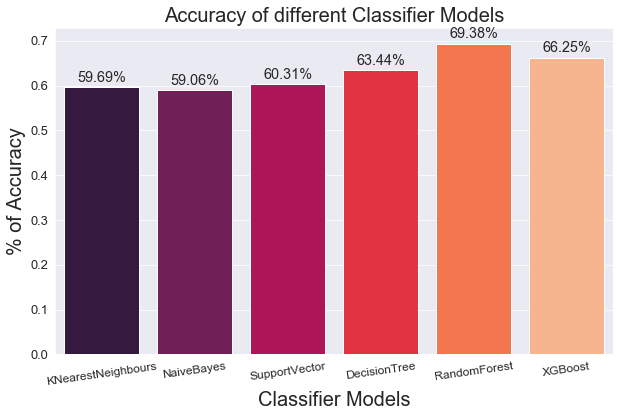

In [152]:
plt.rcParams['figure.figsize']=10,6 
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("% of Accuracy", fontsize = 20)
plt.title("Accuracy of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()